In [14]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import sklearn 
from pandas import Series, DataFrame 
from pylab import rcParams 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image  
import pydotplus

In [15]:
url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url) 
titanic.columns=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ti cket','Fare','Cabin','E mbarked']

In [16]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ti cket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic.fillna(titanic['Age'].mean(), inplace=True)

In [19]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ti cket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,29.6991,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,29.6991,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,29.6991,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,29.6991,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,29.6991,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [83]:
X = titanic.drop(columns = ['Survived', 'Name', 'Cabin', 'Ti cket', 'E mbarked','Sex', 'PassengerId'])
y = titanic['Survived']

In [84]:
X

,Pclass,Age,SibSp,Parch,Fare
0,3,22.000000,1,0,7.2500
1,1,38.000000,1,0,71.2833
2,3,26.000000,0,0,7.9250
3,1,35.000000,1,0,53.1000
4,3,35.000000,0,0,8.0500
...,...,...,...,...,...
886,2,27.000000,0,0,13.0000
887,1,19.000000,0,0,30.0000
888,3,29.699118,1,2,23.4500
889,1,26.000000,0,0,30.0000


In [85]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=355)

In [86]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [87]:
feature_name = list(X.columns)
class_name = list(y_train.unique())
feature_name

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

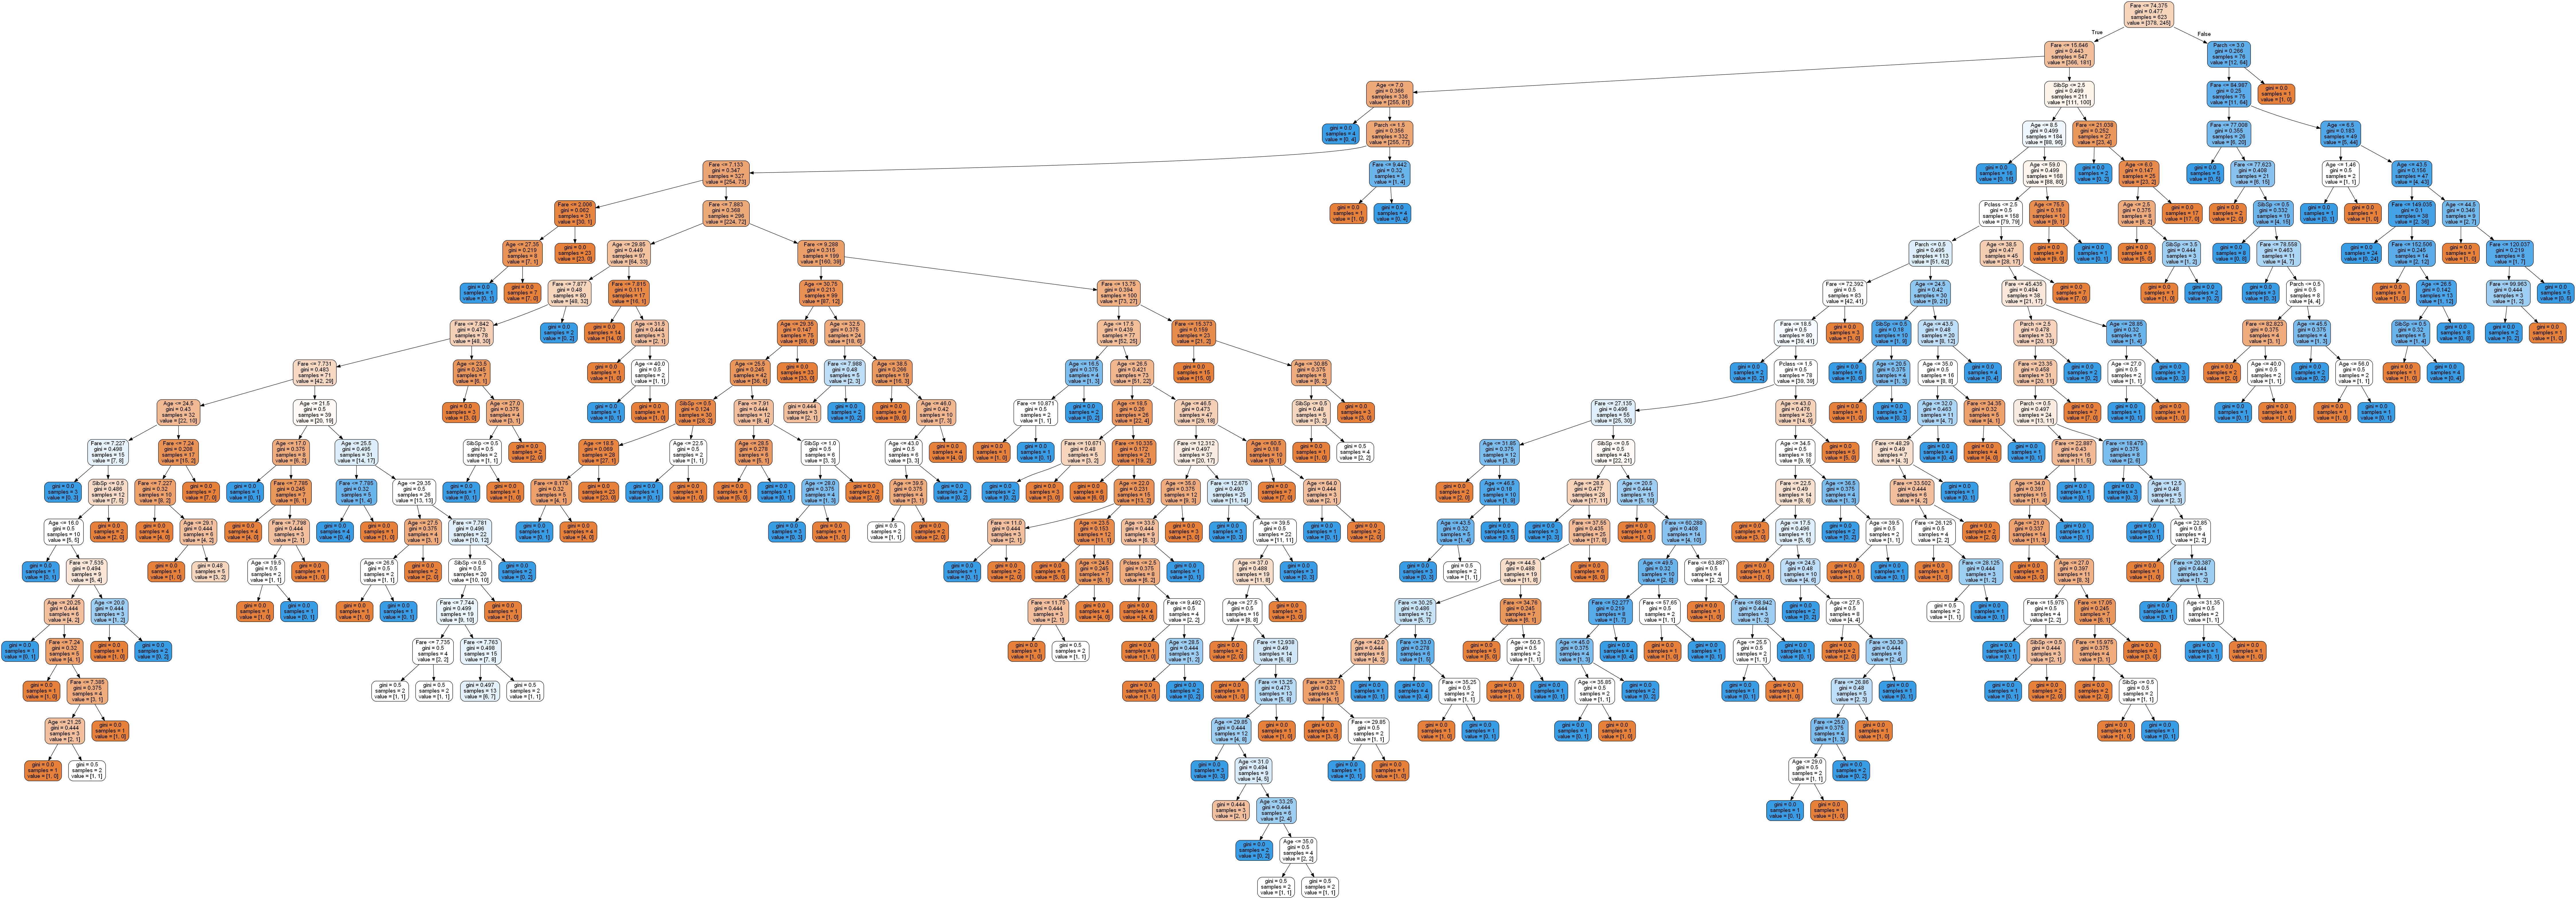

In [88]:
dot_data = export_graphviz(clf, feature_names=feature_name, rounded=True, filled=True)
# draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("myDecisionTree.png")
# show graph
Image(graph.create_png())

In [89]:
clf.score(x_train, y_train)

0.9646869983948636

In [90]:
clf.score(x_test, y_test)

0.6567164179104478

In [91]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 300)

In [93]:
%matplotlib inline

import matplotlib.pyplot as plt

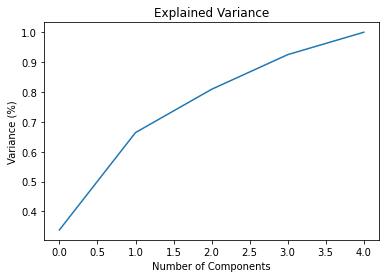

In [94]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

We keep all components because 100% of the variance is explained by 4 components. So we provide all columns as input to algorithms.

In [95]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(x_transform)
principal_x = pd.DataFrame(new_data, columns=['PC-1','PC-2','PC-3','PC-4'])

In [96]:
principal_x

,PC-1,PC-2,PC-3,PC-4
0,-1.150803,-0.069191,0.203607,-0.555803
1,1.758606,0.142885,0.095648,-0.755179
2,-0.889439,-0.718299,0.210813,0.076627
3,1.448581,0.081721,0.157688,-0.733751
4,-0.574460,-0.939013,-0.344915,0.025358
...,...,...,...,...
886,0.016893,-0.639964,0.406762,0.023234
887,0.744432,-0.251422,1.240273,0.018229
888,-0.787938,1.399087,-1.056586,1.100596
889,0.988317,-0.423810,0.807379,-0.021624


In [97]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.6492537313432836

In [98]:
## GridsearchCV
grid_params = {
    'criterion':['gini', 'entropy'],
    'max_depth':range(2,10,1),
    'min_samples_leaf':range(2,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best', 'random']
}


In [99]:
grid_search = GridSearchCV(estimator=clf, param_grid=grid_params, n_jobs=-1)

In [100]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [101]:
best_parameters = grid_search.best_params_

In [102]:
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 6, 'splitter': 'random'}


In [103]:
grid_search.best_score_

0.7288

In [104]:
clf = DecisionTreeClassifier(
    criterion='gini',max_depth= 5, min_samples_leaf= 7, min_samples_split= 2, splitter='best'
)

In [105]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7)

In [106]:
clf.score(x_test, y_test)

0.7089552238805971

In [107]:
feature_name

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [109]:
clf.predict([['3','45','0','36.22']])

array([1], dtype=int64)

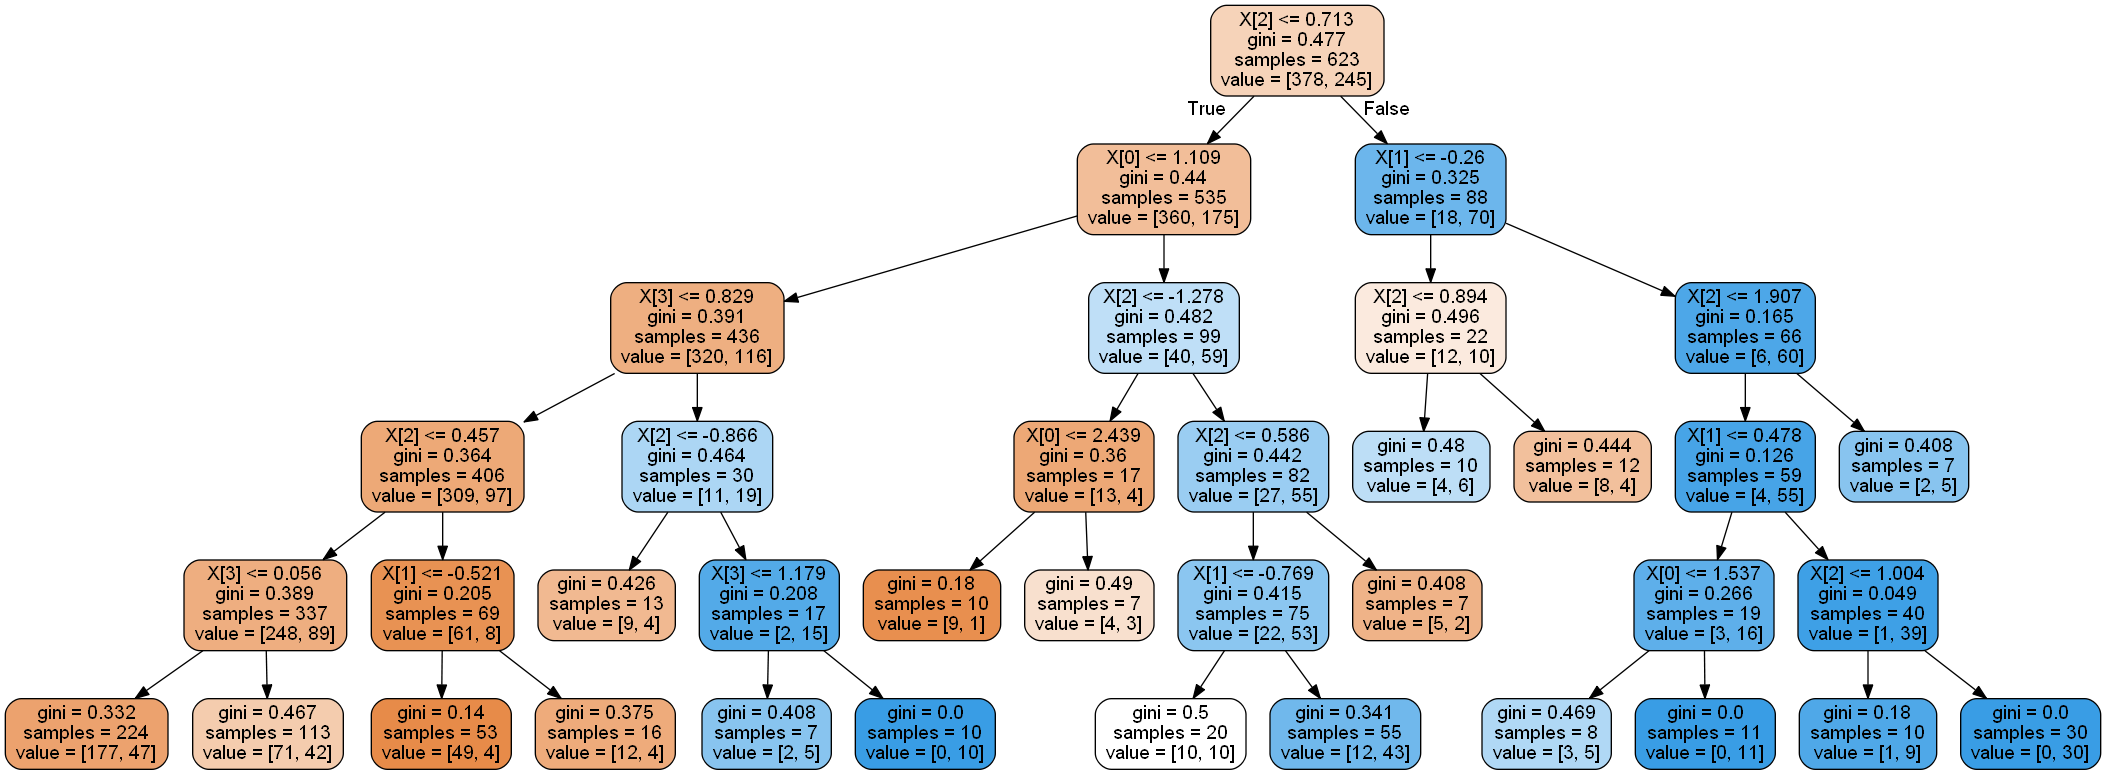

In [110]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())